In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
newsdata = fetch_20newsgroups(subset = 'train') # 'train'을 기재하면 훈련 데이터만 리턴한다.

In [3]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [4]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [5]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [7]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제 : rec.autos


In [8]:
print(newsdata.data[0]) # 첫번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [9]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


In [11]:
data.isnull().values.any()

False

In [12]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


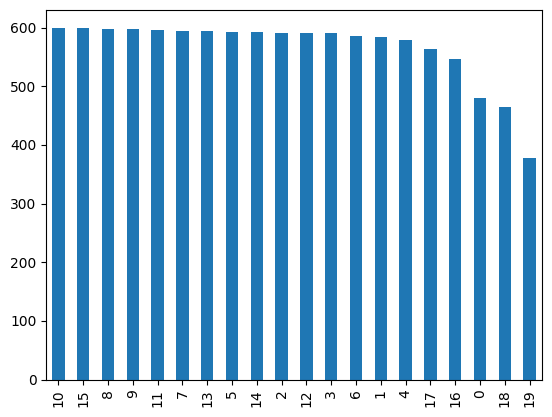

In [13]:
data['target'].value_counts().plot(kind='bar');

In [14]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [15]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [16]:
vocab_size = 10000
num_classes = 20

In [17]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    tokenizer = Tokenizer(num_words = vocab_size) # vocab_size 개수만큼의 단어만 사용한다.
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    return X_train, X_test, tokenizer.index_word

In [18]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [19]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [20]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


In [21]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(vocab_size,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

In [ ]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/100
80/80 [==============================] - 1s 6ms/step - loss: 2.2845 - accuracy: 0.3376 - val_loss: 0.9521 - val_accuracy: 0.8322
Epoch 2/100
80/80 [==============================] - 0s 5ms/step - loss: 0.8688 - accuracy: 0.7665 - val_loss: 0.4495 - val_accuracy: 0.8878
Epoch 3/100
80/80 [==============================] - 0s 5ms/step - loss: 0.4352 - accuracy: 0.8874 - val_loss: 0.3492 - val_accuracy: 0.9019
Epoch 4/100
80/80 [==============================] - 0s 5ms/step - loss: 0.2602 - accuracy: 0.9355 - val_loss: 0.3064 - val_accuracy: 0.9081
Epoch 5/100
80/80 [==============================] - 0s 5ms/step - loss: 0.1604 - accuracy: 0.9640 - val_loss: 0.2982 - val_accuracy: 0.9108
Epoch 6/100
80/80 [==============================] - 0s 4ms/step - loss: 0.1173 - accuracy: 0.9721 - val_loss: 0.3022 - val_accuracy: 0.9099
Epoch 7/100
80/80 [==============================] - 0s 4ms/step - loss: 0.0827 - accuracy: 0.9815 - val_loss: 0.2973 - val_accuracy: 0.9178
Epoch 8/100
8

Epoch 59/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0144 - accuracy: 0.9963 - val_loss: 0.4412 - val_accuracy: 0.9178
Epoch 60/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0129 - accuracy: 0.9971 - val_loss: 0.4644 - val_accuracy: 0.9205
Epoch 61/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0152 - accuracy: 0.9964 - val_loss: 0.4798 - val_accuracy: 0.9108
Epoch 62/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0111 - accuracy: 0.9972 - val_loss: 0.4683 - val_accuracy: 0.9152
Epoch 63/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0115 - accuracy: 0.9967 - val_loss: 0.4620 - val_accuracy: 0.9223
Epoch 64/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0104 - accuracy: 0.9968 - val_loss: 0.4551 - val_accuracy: 0.9152
Epoch 65/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0084 - accuracy: 0.9981 - val_loss: 0.4783 - val_accuracy: 0.9143
Epoch 

80/80 [==============================] - 0s 5ms/step - loss: 0.1065 - accuracy: 0.9841 - val_loss: 0.4235 - val_accuracy: 0.8940
Epoch 17/100
80/80 [==============================] - 0s 5ms/step - loss: 0.1178 - accuracy: 0.9807 - val_loss: 0.4857 - val_accuracy: 0.8949
Epoch 18/100
80/80 [==============================] - 0s 6ms/step - loss: 0.0971 - accuracy: 0.9861 - val_loss: 0.4011 - val_accuracy: 0.8993
Epoch 19/100
80/80 [==============================] - 0s 5ms/step - loss: 0.1532 - accuracy: 0.9770 - val_loss: 0.4233 - val_accuracy: 0.9072
Epoch 20/100
80/80 [==============================] - 0s 5ms/step - loss: 0.1121 - accuracy: 0.9839 - val_loss: 0.4159 - val_accuracy: 0.8966
Epoch 21/100
80/80 [==============================] - 0s 5ms/step - loss: 0.1140 - accuracy: 0.9821 - val_loss: 0.4226 - val_accuracy: 0.8984
Epoch 22/100
80/80 [==============================] - 0s 5ms/step - loss: 0.1286 - accuracy: 0.9866 - val_loss: 0.4599 - val_accuracy: 0.8984
Epoch 23/100
80/80 

Epoch 74/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0128 - accuracy: 0.9974 - val_loss: 0.6428 - val_accuracy: 0.9019
Epoch 75/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.9969 - val_loss: 0.6661 - val_accuracy: 0.8993
Epoch 76/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0386 - accuracy: 0.9961 - val_loss: 0.7301 - val_accuracy: 0.8913
Epoch 77/100
80/80 [==============================] - 0s 6ms/step - loss: 0.0485 - accuracy: 0.9942 - val_loss: 0.6944 - val_accuracy: 0.8949
Epoch 78/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0840 - accuracy: 0.9924 - val_loss: 0.6873 - val_accuracy: 0.8949
Epoch 79/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0540 - accuracy: 0.9907 - val_loss: 0.7635 - val_accuracy: 0.8878
Epoch 80/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0717 - accuracy: 0.9920 - val_loss: 0.6571 - val_accuracy: 0.8913
Epoch 

80/80 [==============================] - 0s 5ms/step - loss: 0.0455 - accuracy: 0.9908 - val_loss: 0.4723 - val_accuracy: 0.9152
Epoch 32/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0302 - accuracy: 0.9936 - val_loss: 0.5068 - val_accuracy: 0.9081
Epoch 33/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0676 - accuracy: 0.9911 - val_loss: 0.5332 - val_accuracy: 0.9143
Epoch 34/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0607 - accuracy: 0.9886 - val_loss: 0.5121 - val_accuracy: 0.9117
Epoch 35/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0661 - accuracy: 0.9890 - val_loss: 0.4844 - val_accuracy: 0.9090
Epoch 36/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0441 - accuracy: 0.9917 - val_loss: 0.4646 - val_accuracy: 0.9161
Epoch 37/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0468 - accuracy: 0.9896 - val_loss: 0.4687 - val_accuracy: 0.9125
Epoch 38/100
80/80 

Epoch 89/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0221 - accuracy: 0.9957 - val_loss: 0.6260 - val_accuracy: 0.9161
Epoch 90/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0238 - accuracy: 0.9965 - val_loss: 0.6425 - val_accuracy: 0.9223
Epoch 91/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0206 - accuracy: 0.9952 - val_loss: 0.6130 - val_accuracy: 0.9196
Epoch 92/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0169 - accuracy: 0.9954 - val_loss: 0.6568 - val_accuracy: 0.9178
Epoch 93/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0173 - accuracy: 0.9968 - val_loss: 0.6656 - val_accuracy: 0.9134
Epoch 94/100
80/80 [==============================] - 0s 6ms/step - loss: 0.0165 - accuracy: 0.9970 - val_loss: 0.6606 - val_accuracy: 0.9161
Epoch 95/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0256 - accuracy: 0.9963 - val_loss: 0.6371 - val_accuracy: 0.9134
Epoch 